In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
from sklearn.dummy import DummyRegressor

ModuleNotFoundError: No module named 'pandas'

In [102]:
# Load the data
data = pd.read_csv('stock.csv')

# Display the first few rows of the dataset
print(data.head())

         Date        Open        High         Low       Close  Adj Close  \
0  2004-08-27  122.800003  122.800003  119.820000  120.332497  88.088272   
1  2004-08-30  121.237503  123.750000  120.625000  123.345001  90.293549   
2  2004-08-31  123.312500  123.750000  122.000000  123.512497  90.416122   
3  2004-09-01  123.750000  124.375000  122.949997  123.487503  90.397820   
4  2004-09-02  123.737503  125.574997  123.250000  124.207497  90.924896   

       Volume  
0  30646000.0  
1  24465208.0  
2  21194656.0  
3  19935544.0  
4  21356352.0  


In [104]:
# 1. Check the shape of the DataFrame
print("Shape of the dataset:", data.shape)


Shape of the dataset: (4494, 7)


In [106]:
# 2. View data types of each column
print("\nData types of each column:")
print(data.dtypes)



Data types of each column:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [108]:
# 3. Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])  # Display only columns with missing values




Missing values in each column:
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64


In [110]:
# 4. View summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
              Open         High          Low        Close    Adj Close  \
count  4486.000000  4486.000000  4486.000000  4486.000000  4486.000000   
mean   1146.182768  1158.538059  1132.825428  1145.521462  1049.456965   
std     994.070086  1003.010607   984.043404   993.346465   992.062558   
min     112.000000   116.112503   103.837502   111.550003    86.565590   
25%     290.693748   295.300010   285.931259   290.275009   219.902748   
50%     977.450012   995.000000   970.250000   981.337524   820.627839   
75%    1564.774963  1597.287476  1548.662537  1576.781219  1443.631561   
max    4033.949951  4043.000000  3980.000000  4019.149902  3964.502686   

             Volume  
count  4.486000e+03  
mean   3.620596e+06  
std    3.162368e+06  
min    0.000000e+00  
25%    1.942489e+06  
50%    2.804749e+06  
75%    4.297410e+06  
max    8.806715e+07  


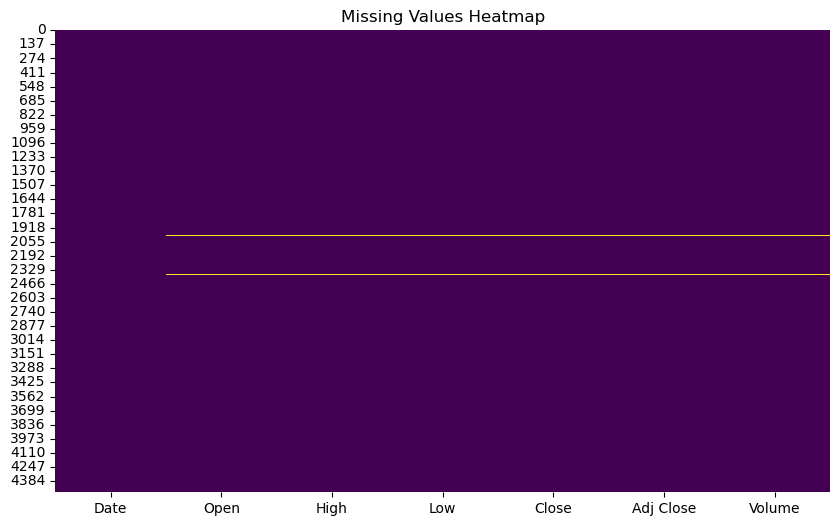

In [112]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [114]:
# Assume 'close' is the column we want to predict (replace with your actual target column name)
target_column = 'Close'


In [116]:
# Drop the 'Date' column if it's present
data = data.drop(columns=['Date'], errors='ignore')


In [118]:
print(data.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [120]:
#define target variable
X = data.drop(columns=[target_column])
y = data[target_column]


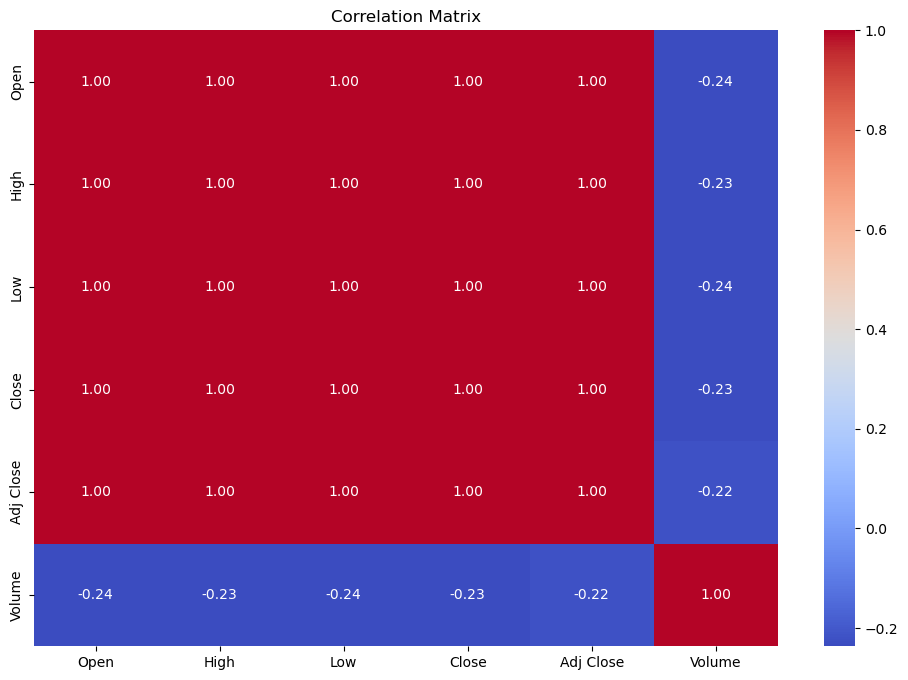

In [122]:
# 1. Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [124]:
# Fill missing values with the mean of each column
data_filled = data.fillna(data.mean())


In [126]:
# Display the number of missing values after handling
print("\nMissing values after filling:")
print(data_filled.isnull().sum())



Missing values after filling:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [128]:
#Min-Max Scaling
# min_max_scaler = MinMaxScaler()
# X_min_max_scaled = min_max_scaler.fit_transform(X)

# Standardization
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)

# #  Robust Scaling
# robust_scaler = RobustScaler()
# X_robust_scaled = robust_scaler.fit_transform(X)

# Convert scaled arrays back to DataFrame for easier handling
# X_min_max_scaled_df = pd.DataFrame(X_min_max_scaled, columns=X.columns)
 X_standard_scaled_df = pd.DataFrame(X_standard_scaled, columns=X.columns)
# X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=X.columns)


In [146]:
# # Display the first few rows of the scaled data
# print("Min-Max Scaled Data:")
# print(X_min_max_scaled_df.head())

print("\nStandardized Data:")
print(X_standard_scaled_df.head())

# print("\nRobust Scaled Data:")
# print(X_robust_scaled_df.head())


Standardized Data:
       Open      High       Low  Adj Close    Volume
0 -1.029602 -1.032744 -1.029546  -0.969169  8.546891
1 -1.031174 -1.031797 -1.028728  -0.966945  6.592191
2 -1.029087 -1.031797 -1.027331  -0.966822  5.557866
3 -1.028647 -1.031174 -1.026365  -0.966840  5.159667
4 -1.028659 -1.029977 -1.026060  -0.966309  5.609003


Text(0, 0.5, 'Frequency')

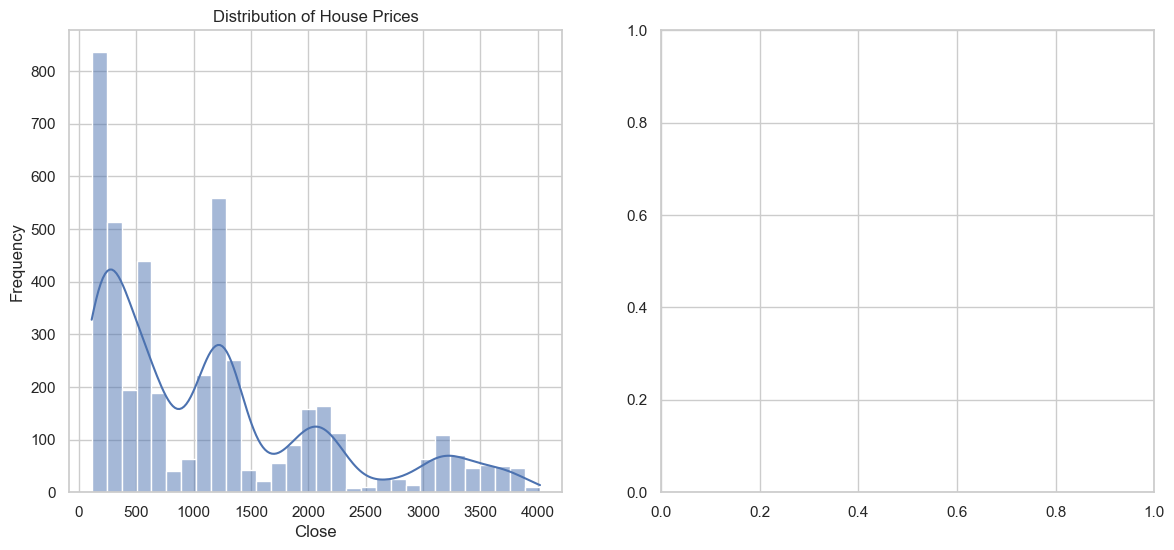

In [148]:
# Set the style for seaborn
sns.set(style="whitegrid")
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(data['Close'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of House Prices')
axes[0].set_xlabel('Close')
axes[0].set_ylabel('Frequency')


In [200]:
# Assuming df is your dataset and 'price' is the target variable
price_scaler = StandardScaler()
data[['Close']] = price_scaler.fit_transform(data[['Close']])

In [150]:
# Define features and target variable
X = data.drop('Close', axis=1)  # Features
y = data['Close']                 # Target variable


In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3595, 5) (3595,)
Testing set shape: (899, 5) (899,)


In [164]:
# Initialize the models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
xgboost_model = xgb.XGBRegressor(random_state=42)


In [166]:

# Train the models
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [168]:
# Save the trained model
import joblib
joblib.dump(xgboost_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [196]:
joblib.dump(standard_scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [170]:
# Make predictions
linear_predictions = linear_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
xgboost_predictions = xgboost_model.predict(X_test)


In [172]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation:")
    print(f" - MAE: {mae:.2f}")
    print(f" - RMSE: {rmse:.2f}")
    print(f" - R²: {r2:.2f}\n")

In [182]:
# Evaluate each model
evaluate_model(y_test, linear_predictions, "Linear Regression")
evaluate_model(y_test, decision_tree_predictions, "Decision Tree")
evaluate_model(y_test, random_forest_predictions, "Random Forest")
# evaluate_model(y_test, xgboost_predictions, "XGBoost")  # Uncomment if using XGBoost

Linear Regression Evaluation:
 - MAE: 5.13
 - RMSE: 8.12
 - R²: 1.00

Decision Tree Evaluation:
 - MAE: 5.68
 - RMSE: 10.01
 - R²: 1.00

Random Forest Evaluation:
 - MAE: 4.67
 - RMSE: 7.83
 - R²: 1.00



In [184]:
# Analyzing Residuals
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

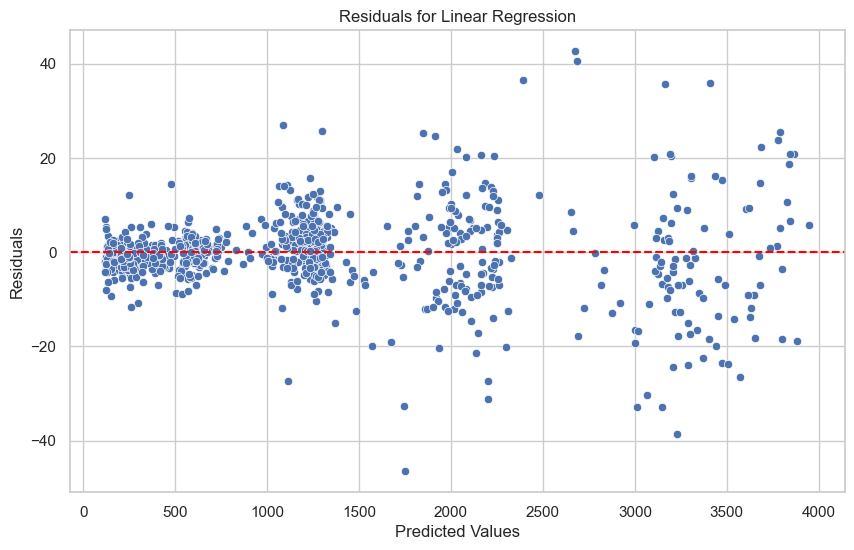

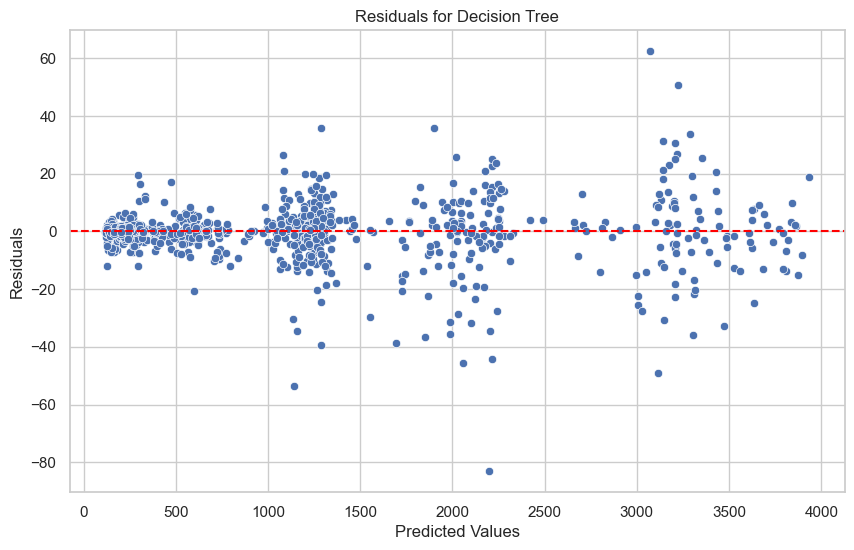

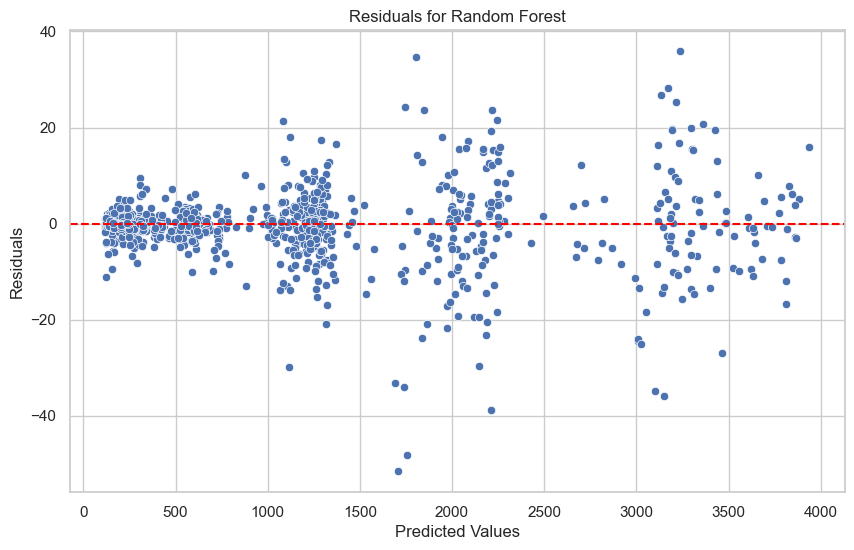

In [186]:
# Plot residuals for each model
plot_residuals(y_test, linear_predictions, "Linear Regression")
plot_residuals(y_test, decision_tree_predictions, "Decision Tree")
plot_residuals(y_test, random_forest_predictions, "Random Forest")
# plot_residuals(y_test, xgboost_predictions, "XGBoost")  # Uncomment if using XGBoost

In [192]:
# Create a Dummy Regressor
baseline_model = DummyRegressor(strategy='mean')

# Fit the baseline model
baseline_model.fit(X_train, y_train)

# Make predictions using the baseline model
baseline_predictions = baseline_model.predict(X_test)

# Evaluate the baseline model
evaluate_model(y_test, baseline_predictions, "Baseline Model (Dummy Regressor)")

# Compare with previously evaluated models
print("Comparison of Model Performance:")
print("---------------------------------------------------")
evaluate_model(y_test, linear_predictions, "Linear Regression")
evaluate_model(y_test, decision_tree_predictions, "Decision Tree")
evaluate_model(y_test, random_forest_predictions, "Random Forest")
# evaluate_model(y_test, xgboost_predictions, "XGBoost")  # Uncomment if using XGBoost

# Optionally, you can visualize the comparison of MAE, RMSE, and R²
models = ['Baseline', 'Linear Regression', 'Decision Tree', 'Random Forest']
mae_values = [
    mean_absolute_error(y_test, baseline_predictions),
    mean_absolute_error(y_test, linear_predictions),
    mean_absolute_error(y_test, decision_tree_predictions),
    mean_absolute_error(y_test, random_forest_predictions),
]

rmse_values = [
    np.sqrt(mean_squared_error(y_test, baseline_predictions)),
    np.sqrt(mean_squared_error(y_test, linear_predictions)),
    np.sqrt(mean_squared_error(y_test, decision_tree_predictions)),
    np.sqrt(mean_squared_error(y_test, random_forest_predictions)),
]

r2_values = [
    r2_score(y_test, baseline_predictions),
    r2_score(y_test, linear_predictions),
    r2_score(y_test, decision_tree_predictions),
    r2_score(y_test, random_forest_predictions),
]

# Creating a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R²': r2_values
})

print(comparison_df)

Baseline Model (Dummy Regressor) Evaluation:
 - MAE: 800.39
 - RMSE: 1009.75
 - R²: -0.00

Comparison of Model Performance:
---------------------------------------------------
Linear Regression Evaluation:
 - MAE: 5.13
 - RMSE: 8.12
 - R²: 1.00

Decision Tree Evaluation:
 - MAE: 5.68
 - RMSE: 10.01
 - R²: 1.00

Random Forest Evaluation:
 - MAE: 4.67
 - RMSE: 7.83
 - R²: 1.00

               Model         MAE         RMSE        R²
0           Baseline  800.393823  1009.749741 -0.000280
1  Linear Regression    5.131981     8.116865  0.999935
2      Decision Tree    5.677444    10.008911  0.999902
3      Random Forest    4.671811     7.826307  0.999940


In [194]:
import joblib

# Assuming xgboost_model is your trained model
joblib.dump(xgboost_model, 'xgboost_model.joblib')


['xgboost_model.joblib']